In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Preparing the data
import pathlib

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setting the path to the dataset directory
data_dir = r"/content/drive/MyDrive/Thesis_Kidney_Stone"
data_dir = pathlib.Path(data_dir)

In [5]:
img_height, img_width = 224, 224
batch_size = 64

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1799 files belonging to 2 classes.
Using 1440 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1799 files belonging to 2 classes.
Using 359 files for validation.


In [9]:
MobileNet_model = Sequential()
IMAGE_SIZE = [224, 224]
mobilenet = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet.trainable = False

17225924/17225924 [==============================] - 0s 0us/step


In [10]:
folders=glob("/content/drive/MyDrive/Thesis_Kidney_Stone/*")
print(len(folders))

2


In [11]:
from tensorflow.keras.models import Model
x = Flatten()(mobilenet.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobilenet.input, outputs=predictions)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs
                    )

Epoch 1/50
23/23 [==============================] - 295s 9s/step - loss: 7.3608 - accuracy: 0.7146 - val_loss: 3.2601 - val_accuracy: 0.8301
Epoch 2/50
23/23 [==============================] - 132s 5s/step - loss: 0.8820 - accuracy: 0.8618 - val_loss: 0.8083 - val_accuracy: 0.8747
Epoch 3/50
23/23 [==============================] - 123s 5s/step - loss: 0.1012 - accuracy: 0.9729 - val_loss: 0.4075 - val_accuracy: 0.9136
Epoch 4/50
23/23 [==============================] - 102s 4s/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.3603 - val_accuracy: 0.9304
Epoch 5/50
23/23 [==============================] - 120s 5s/step - loss: 0.0213 - accuracy: 0.9972 - val_loss: 0.5103 - val_accuracy: 0.9192
Epoch 6/50
23/23 [==============================] - 102s 4s/step - loss: 0.0185 - accuracy: 0.9965 - val_loss: 0.4399 - val_accuracy: 0.9220
Epoch 7/50
23/23 [==============================] - 103s 4s/step - loss: 0.0158 - accuracy: 0.9972 - val_loss: 0.4986 - val_accuracy: 0.9220
Epoch 8/50
23

In [14]:
best_accuracy = max(history.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_accuracy1 = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_accuracy1)


Best Training Accuracy: 0.9986110925674438
Best Validation Accuracy: 0.9387186765670776


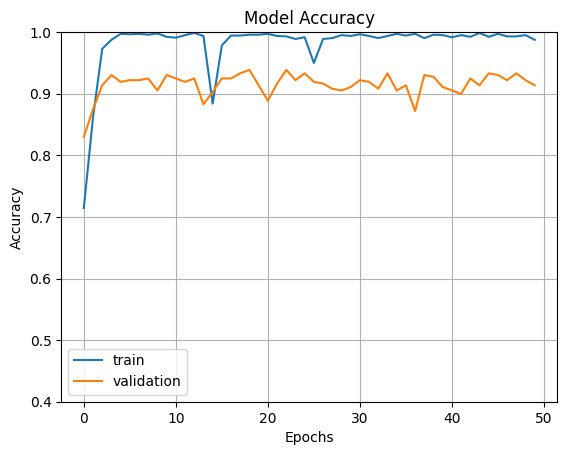

In [15]:
# Evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

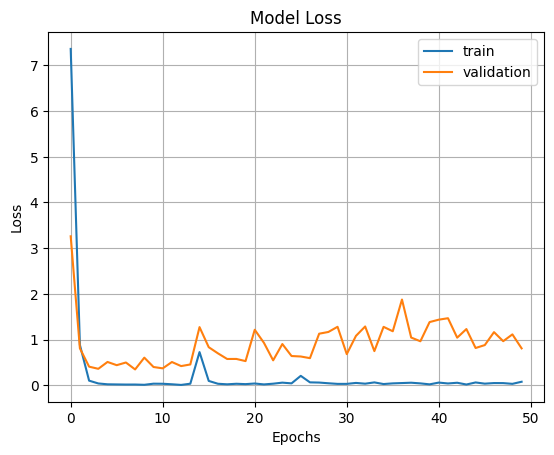

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [17]:
# Generate predictions for the validation dataset
val_predictions = model.predict(val_ds)

# Convert predictions to class labels
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels for the validation dataset
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_true_labels = np.argmax(val_true_labels, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

6/6 [==============================] - 20s 2s/step


In [18]:
# Print the confusion matrix for the best_validation_accuracy (best_accuracy1)
print("Confusion Matrix (Best Validation Accuracy - best_accuracy1):")
print(conf_matrix)

Confusion Matrix (Best Validation Accuracy - best_accuracy1):
[[ 13  49]
 [ 58 239]]


In [19]:
class_names1 = ['Kidney_stone','Normal']

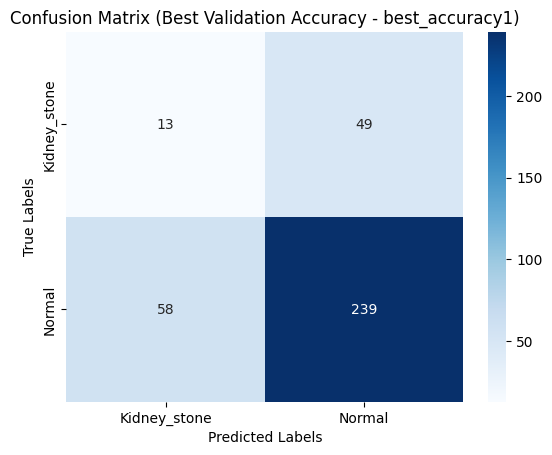

In [21]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names1, yticklabels=class_names1)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Validation Accuracy - best_accuracy1)')
plt.show()